In [26]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

data_file = 'parkinsons_updrs.data'
df = pd.read_csv(data_file)

df.head()
names_file = 'parkinsons_updrs.names'
with open(names_file, 'r') as file:
    content = file.read()
    
print(df)
df.describe()


      subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0            1   72    0     5.6431       28.199       34.398    0.00662   
1            1   72    0    12.6660       28.447       34.894    0.00300   
2            1   72    0    19.6810       28.695       35.389    0.00481   
3            1   72    0    25.6470       28.905       35.810    0.00528   
4            1   72    0    33.6420       29.187       36.375    0.00335   
...        ...  ...  ...        ...          ...          ...        ...   
5870        42   61    0   142.7900       22.485       33.485    0.00406   
5871        42   61    0   149.8400       21.988       32.988    0.00297   
5872        42   61    0   156.8200       21.495       32.495    0.00349   
5873        42   61    0   163.7300       21.007       32.007    0.00281   
5874        42   61    0   170.7300       20.513       31.513    0.00282   

      Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0        

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


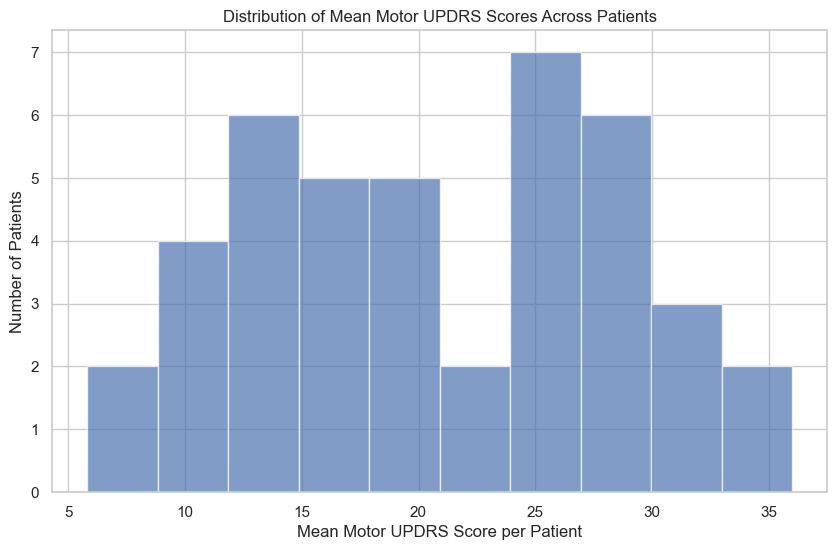

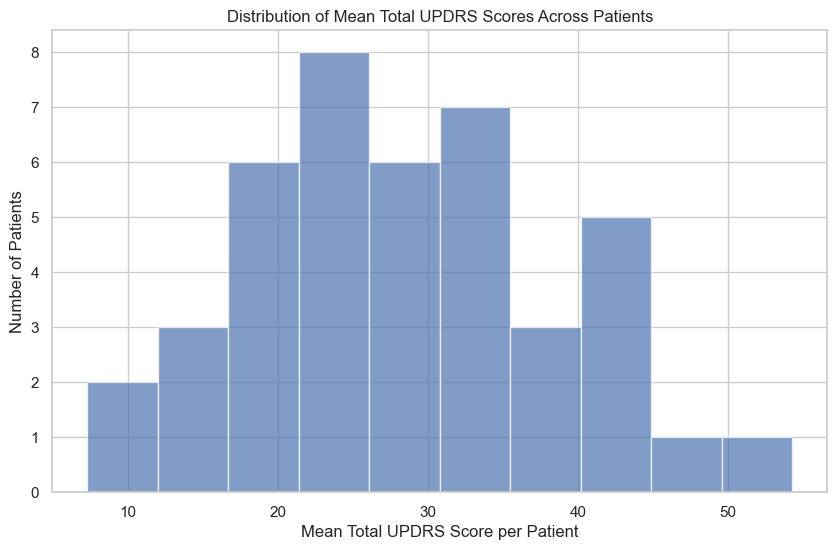


Summary Statistics of Patient Means:

Mean Motor UPDRS across patients:
count    42.00
mean     20.95
std       7.88
min       5.82
25%      13.85
50%      19.83
75%      26.95
max      35.99
Name: motor_UPDRS, dtype: float64

Mean Total UPDRS across patients:
count    42.00
mean     28.54
std      10.44
min       7.30
25%      20.63
50%      27.32
75%      34.51
max      54.25
Name: total_UPDRS, dtype: float64


In [51]:
patient_means = df.groupby('subject#').agg({
    'motor_UPDRS': 'mean',
    'total_UPDRS': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
plt.hist(patient_means['motor_UPDRS'], bins=10, alpha=0.7)
plt.title('Distribution of Mean Motor UPDRS Scores Across Patients')
plt.xlabel('Mean Motor UPDRS Score per Patient')
plt.ylabel('Number of Patients')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(patient_means['total_UPDRS'], bins=10, alpha=0.7)
plt.title('Distribution of Mean Total UPDRS Scores Across Patients')
plt.xlabel('Mean Total UPDRS Score per Patient')
plt.ylabel('Number of Patients')
plt.show()

print("\nSummary Statistics of Patient Means:")
print("\nMean Motor UPDRS across patients:")
print(patient_means['motor_UPDRS'].describe().round(2))
print("\nMean Total UPDRS across patients:")
print(patient_means['total_UPDRS'].describe().round(2))

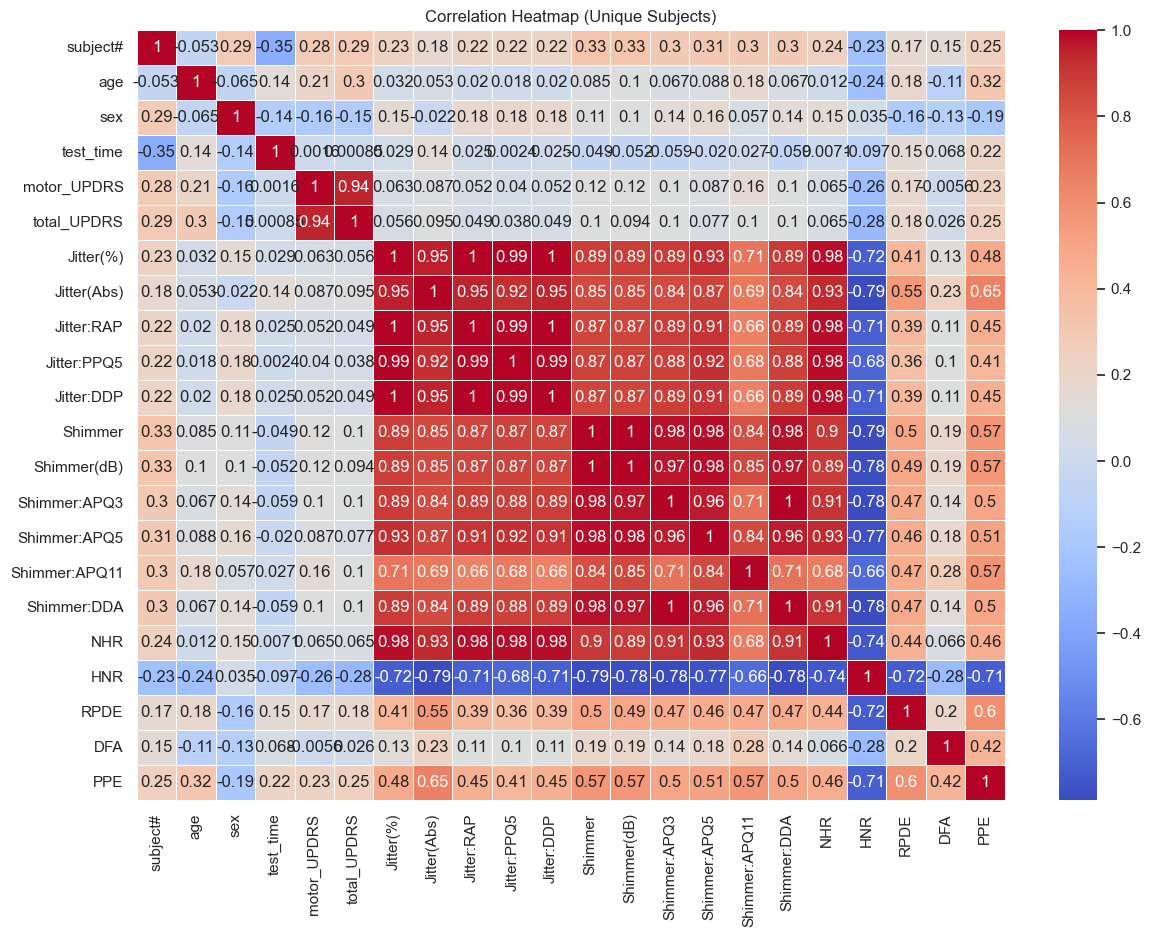

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

df_unique_subjects = df.drop_duplicates(subset='subject#')

plt.figure(figsize=(14, 10))
correlation_matrix = df_unique_subjects.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Unique Subjects)')
plt.show()



In [53]:
df_unique_subjects = df.drop_duplicates(subset='subject#')
plt.figure(figsize=(14, 10), dpi=300)
correlation_matrix = df_unique_subjects.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Unique Subjects)')
plt.savefig('Correlation_Heatmap_Unique_Subjects.png', dpi=300, bbox_inches='tight')
plt.close()

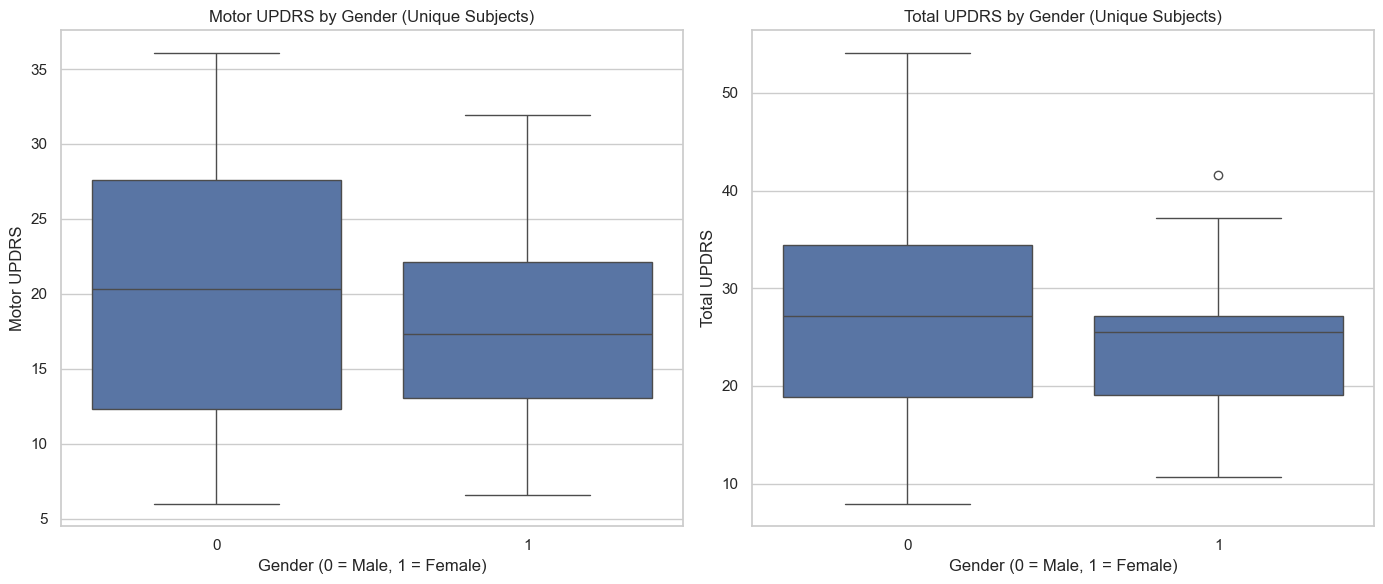

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

df_unique_subjects = df.drop_duplicates(subset='subject#')

sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='sex', y='motor_UPDRS', data=df_unique_subjects)
plt.title('Motor UPDRS by Gender (Unique Subjects)')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Motor UPDRS')

plt.subplot(1, 2, 2)
sns.boxplot(x='sex', y='total_UPDRS', data=df_unique_subjects)
plt.title('Total UPDRS by Gender (Unique Subjects)')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Total UPDRS')

plt.tight_layout()
plt.show()


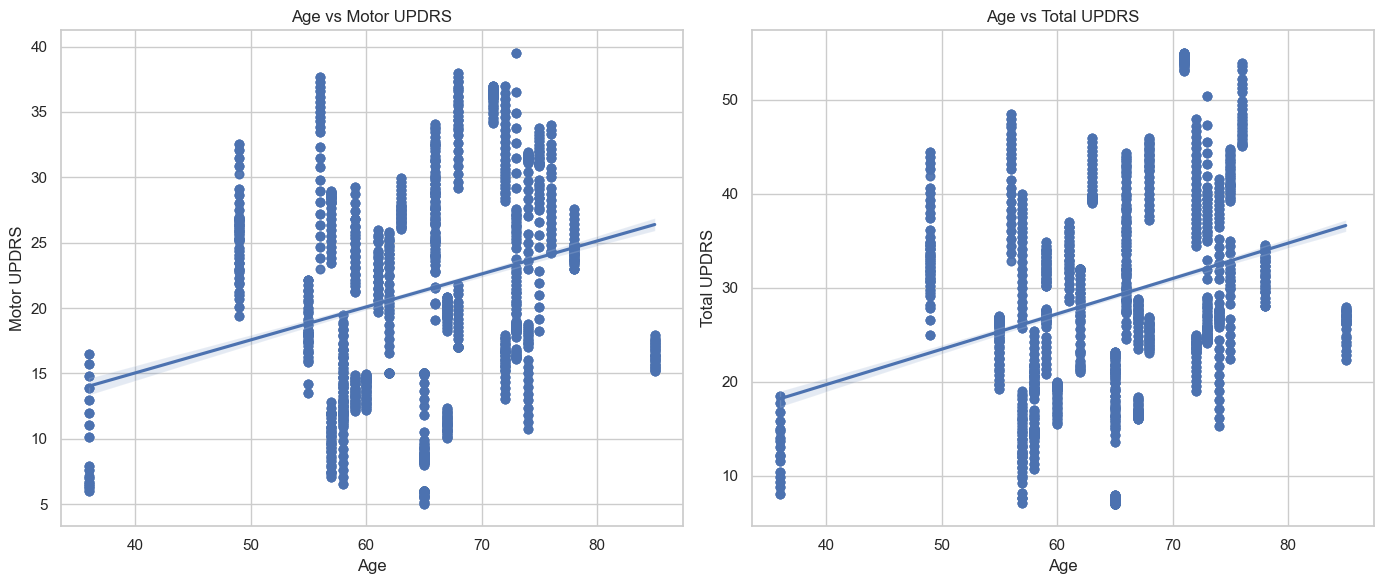

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns


df_unique_subjects = df.drop_duplicates(subset='subject#')

sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.regplot(x='age', y='motor_UPDRS', data=df, scatter_kws={'alpha':0.6})
plt.title('Age vs Motor UPDRS')
plt.xlabel('Age')
plt.ylabel('Motor UPDRS')

plt.subplot(1, 2, 2)
sns.regplot(x='age', y='total_UPDRS', data=df, scatter_kws={'alpha':0.6})
plt.title('Age vs Total UPDRS')
plt.xlabel('Age')
plt.ylabel('Total UPDRS')

plt.tight_layout()
plt.show()


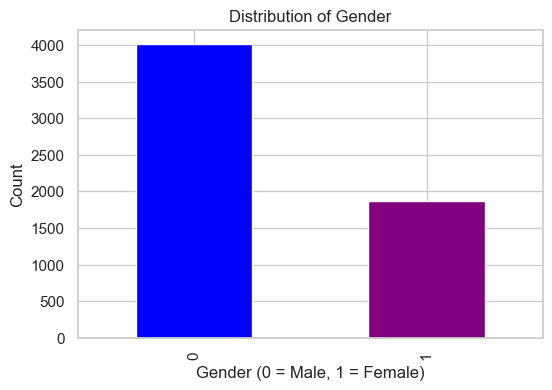

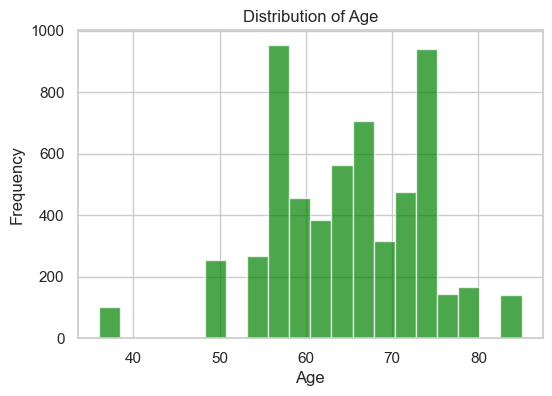

In [31]:
import matplotlib.pyplot as plt


plt.figure(figsize=(6,4))
df['sex'].value_counts().plot(kind='bar', color=['blue', 'purple'])
plt.title('Distribution of Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df['age'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


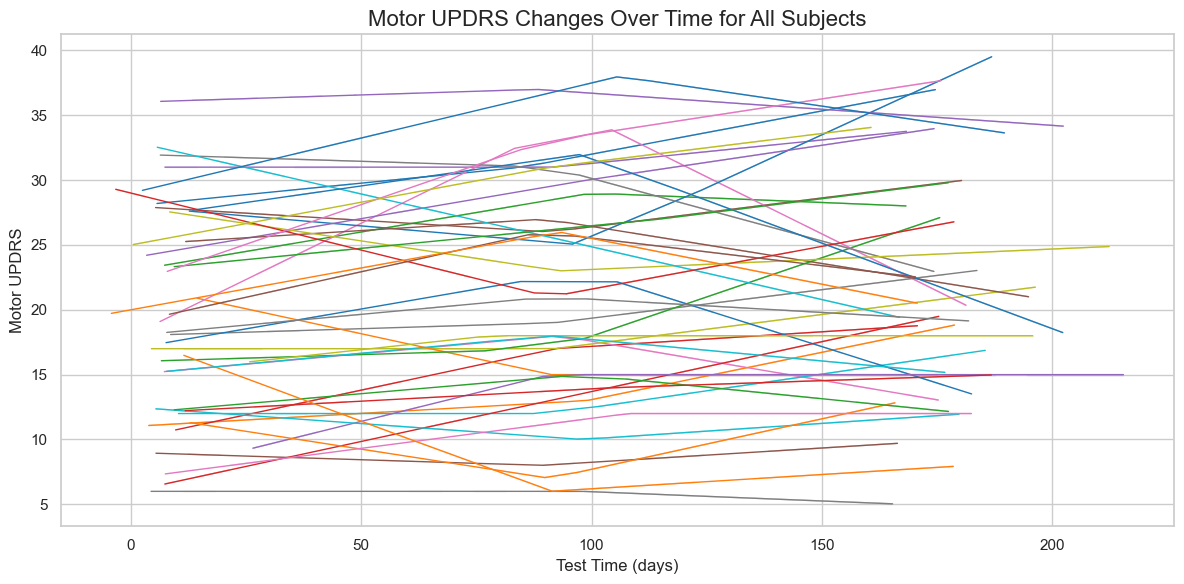

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

sns.lineplot(x='test_time', y='motor_UPDRS', hue='subject#', data=df, palette="tab10", linewidth=1, legend=False)

plt.title("Motor UPDRS Changes Over Time for All Subjects", fontsize=16)
plt.xlabel("Test Time (days)", fontsize=12)
plt.ylabel("Motor UPDRS", fontsize=12)

plt.tight_layout()
plt.show()


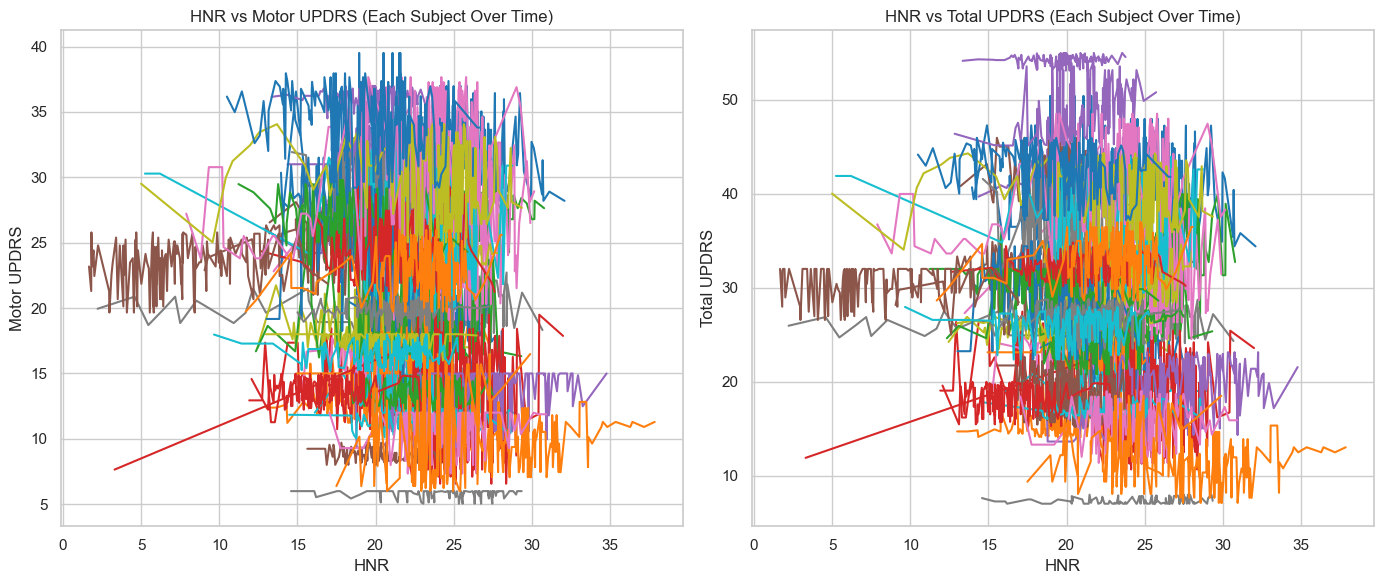

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x='HNR', y='motor_UPDRS', hue='subject#', data=df, palette='tab10', legend=False)
plt.title('HNR vs Motor UPDRS (Each Subject Over Time)')
plt.xlabel('HNR')
plt.ylabel('Motor UPDRS')

plt.subplot(1, 2, 2)
sns.lineplot(x='HNR', y='total_UPDRS', hue='subject#', data=df, palette='tab10', legend=False)
plt.title('HNR vs Total UPDRS (Each Subject Over Time)')
plt.xlabel('HNR')
plt.ylabel('Total UPDRS')

plt.tight_layout()
plt.show()


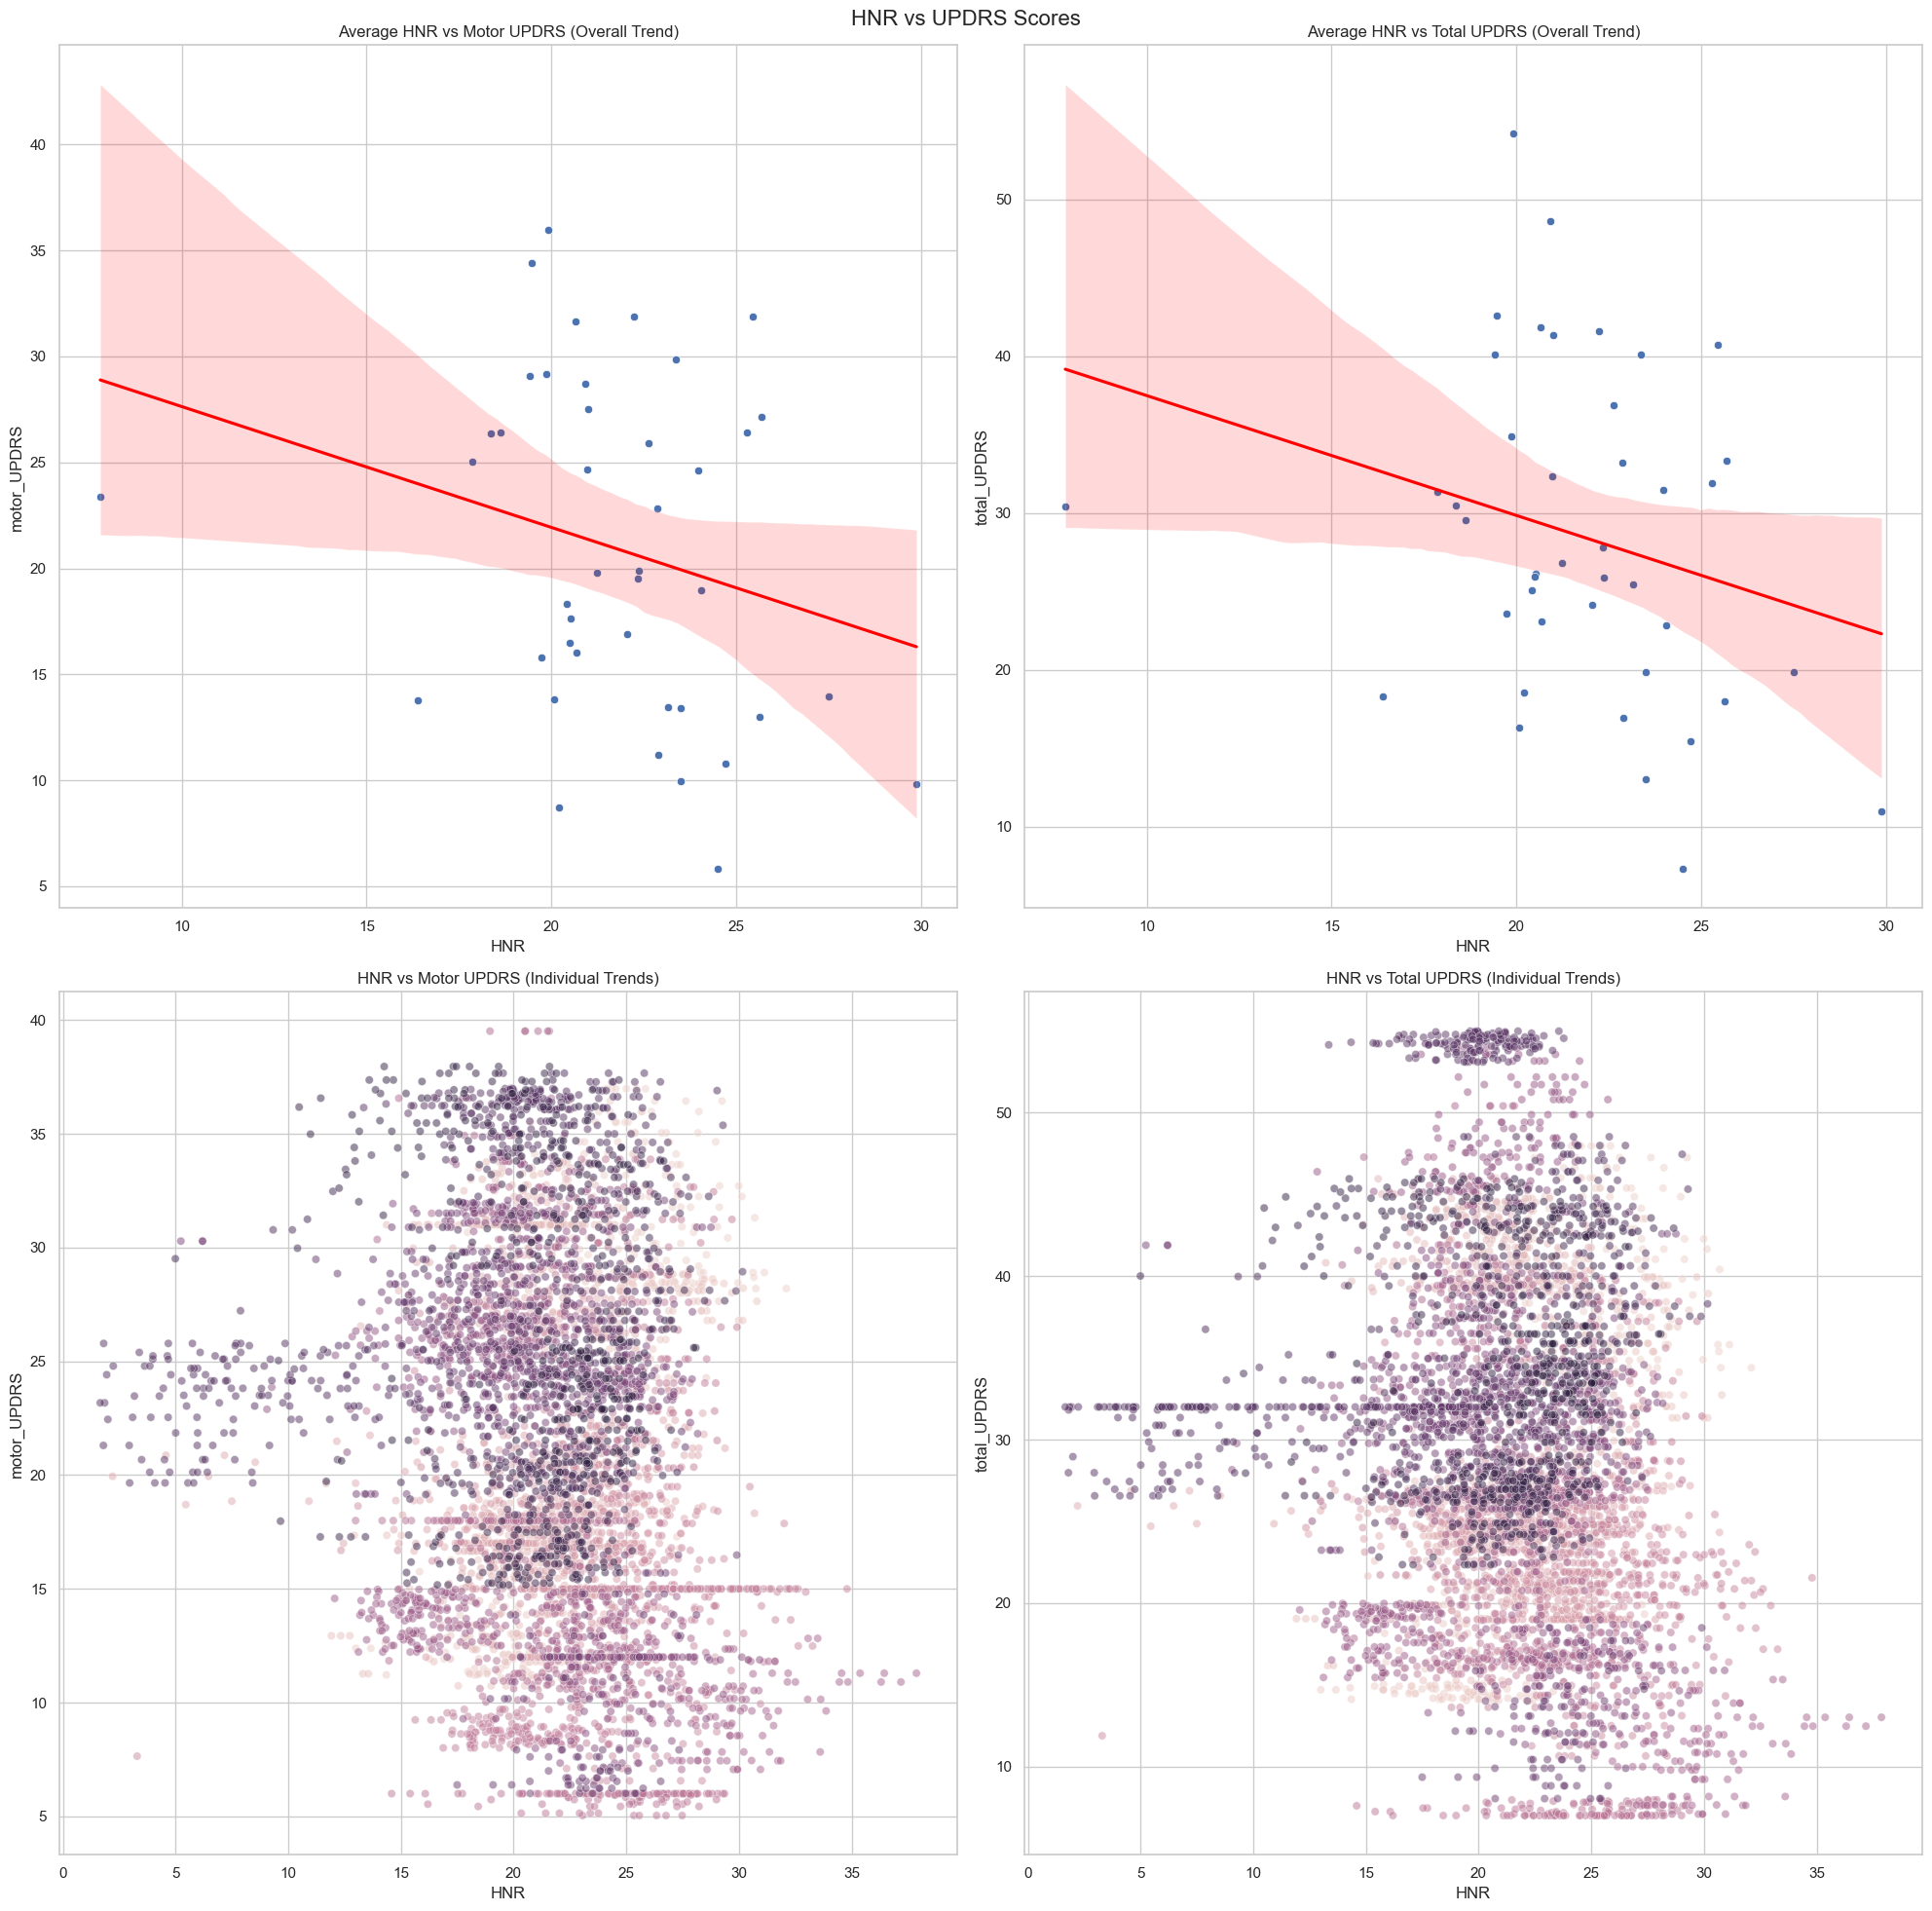

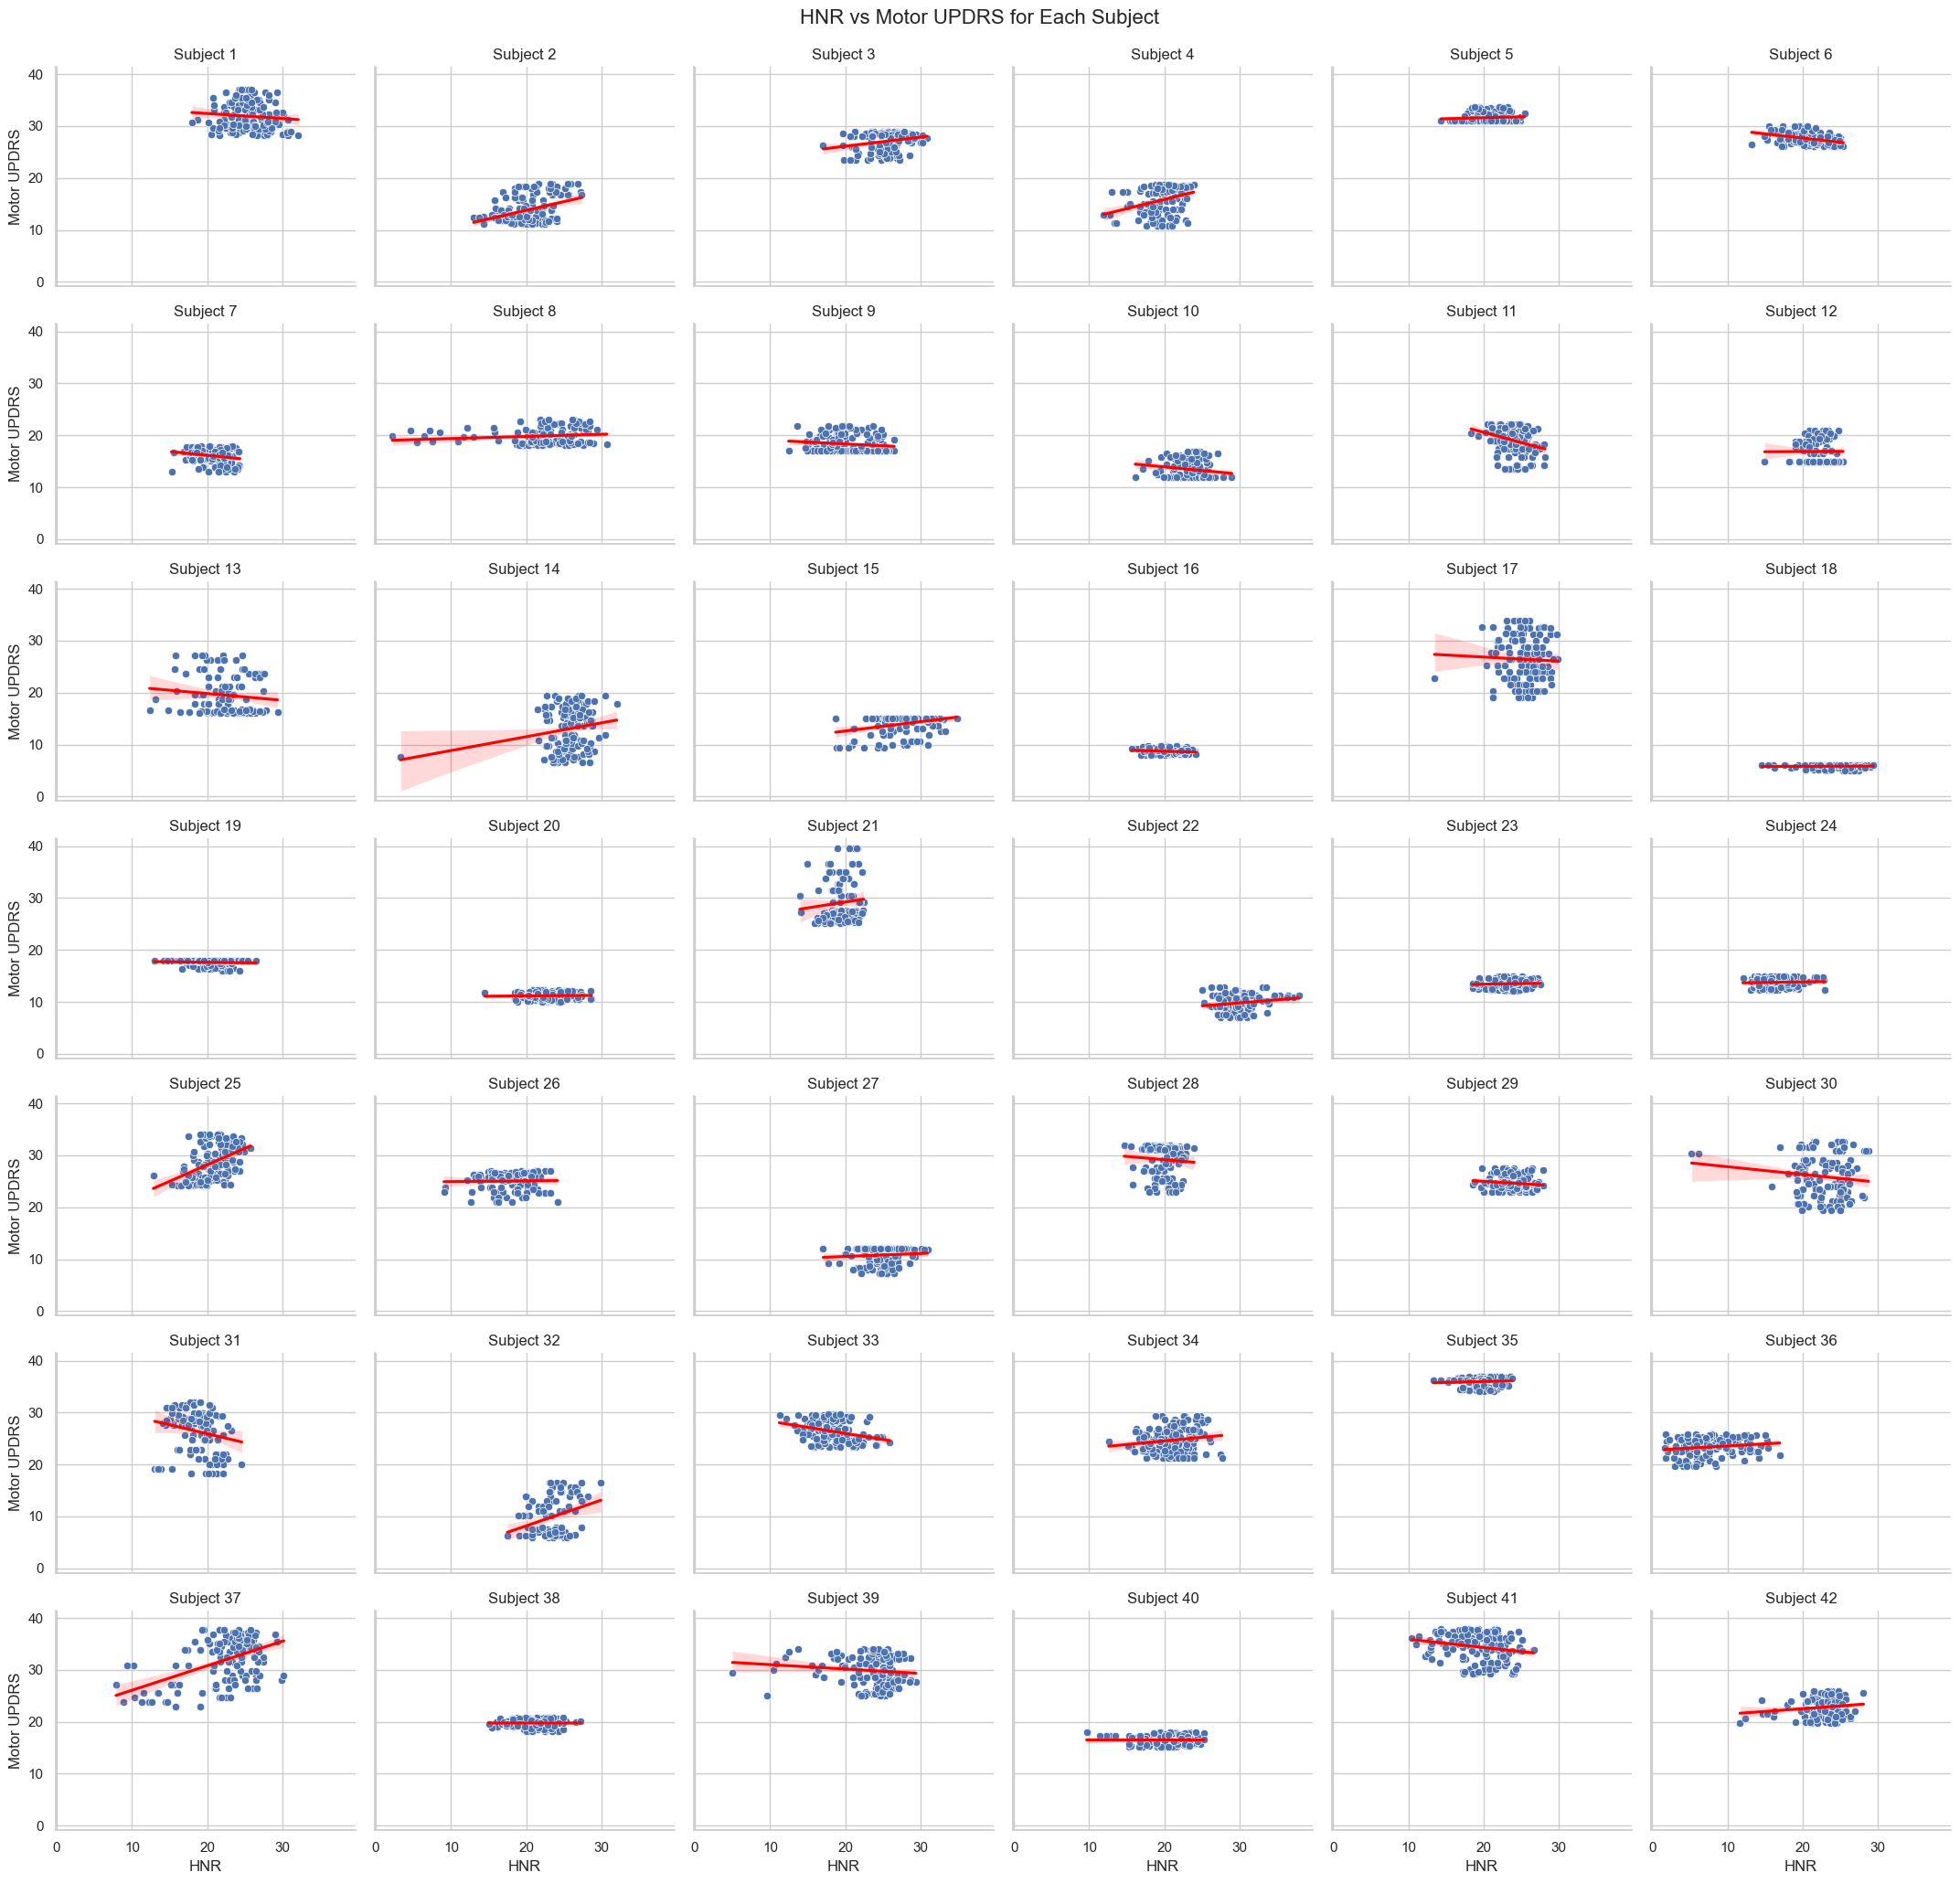

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df_agg = df.groupby('subject#').agg({
   'HNR': 'mean',
   'motor_UPDRS': 'mean', 
   'total_UPDRS': 'mean'
}).reset_index()

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle('HNR vs UPDRS Scores', fontsize=16)

sns.scatterplot(x='HNR', y='motor_UPDRS', data=df_agg, ax=axes[0, 0])
sns.regplot(x='HNR', y='motor_UPDRS', data=df_agg, ax=axes[0, 0], scatter=False, color='red')
axes[0, 0].set_title('Average HNR vs Motor UPDRS (Overall Trend)')

sns.scatterplot(x='HNR', y='total_UPDRS', data=df_agg, ax=axes[0, 1])
sns.regplot(x='HNR', y='total_UPDRS', data=df_agg, ax=axes[0, 1], scatter=False, color='red')
axes[0, 1].set_title('Average HNR vs Total UPDRS (Overall Trend)')

sns.scatterplot(x='HNR', y='motor_UPDRS', hue='subject#', data=df, ax=axes[1, 0], legend=False, alpha=0.5)
axes[1, 0].set_title('HNR vs Motor UPDRS (Individual Trends)')

sns.scatterplot(x='HNR', y='total_UPDRS', hue='subject#', data=df, ax=axes[1, 1], legend=False, alpha=0.5)
axes[1, 1].set_title('HNR vs Total UPDRS (Individual Trends)')

plt.tight_layout()
plt.show()

g = sns.FacetGrid(df, col="subject#", col_wrap=6, height=3, aspect=1.2)
g.map(sns.scatterplot, "HNR", "motor_UPDRS")
g.map(sns.regplot, "HNR", "motor_UPDRS", scatter=False, color='red')
g.set_axis_labels("HNR", "Motor UPDRS")
g.set_titles("Subject {col_name}")
g.fig.suptitle('HNR vs Motor UPDRS for Each Subject', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

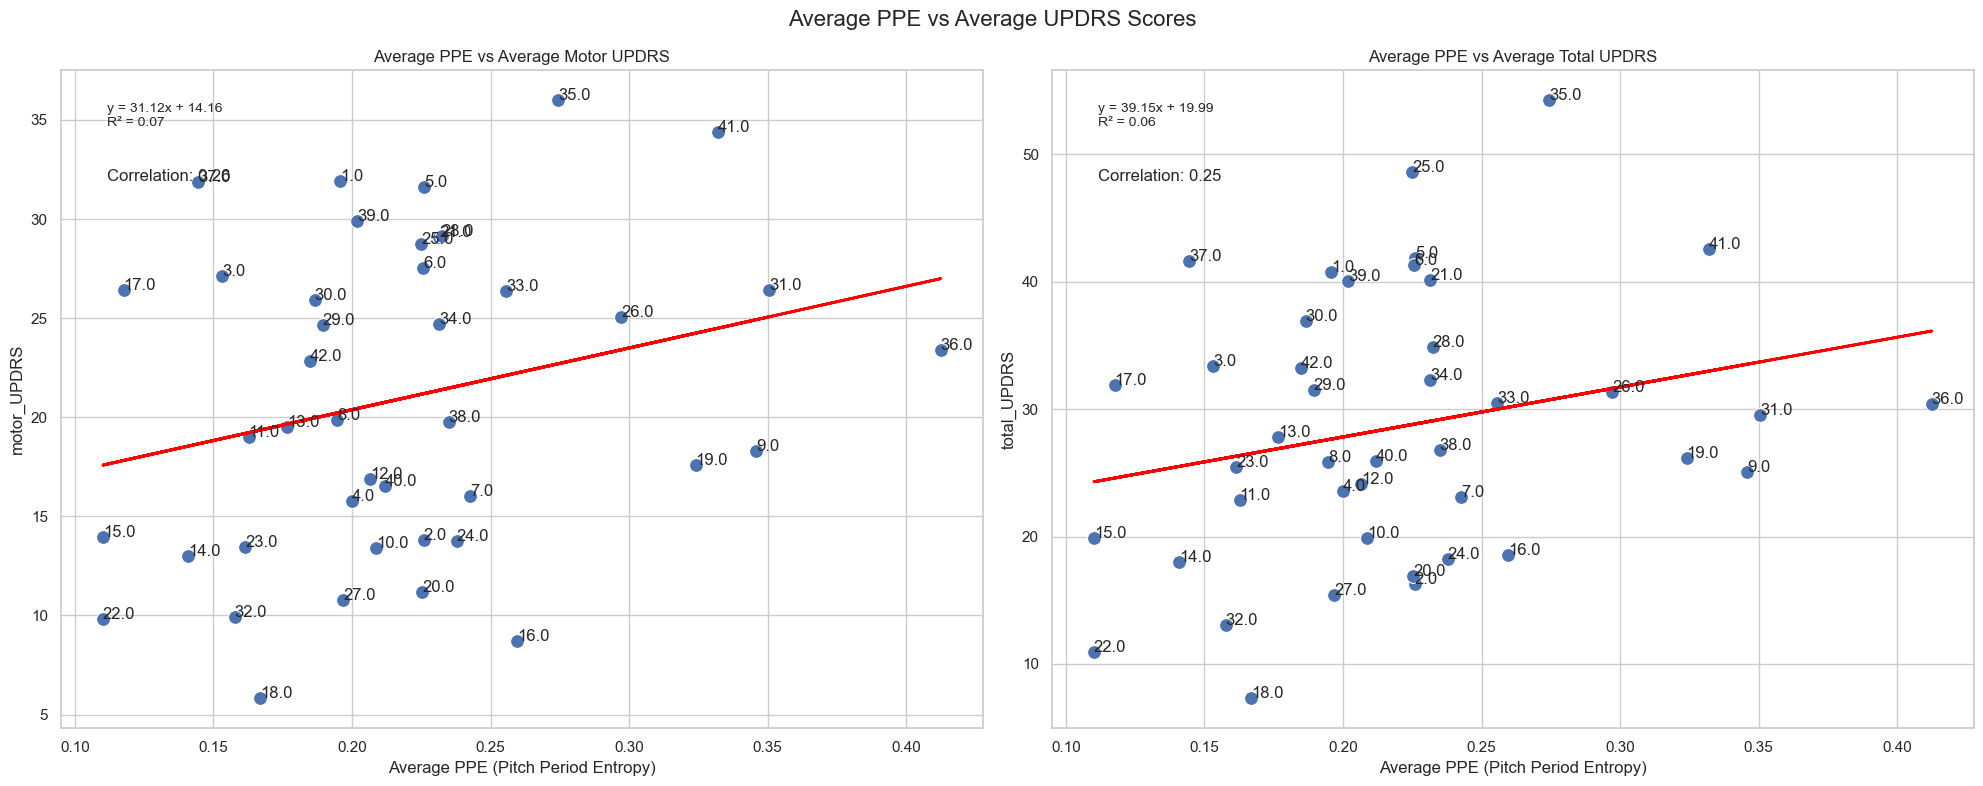

             PPE  motor_UPDRS  total_UPDRS
count  42.000000    42.000000    42.000000
mean    0.218307    20.953456    28.537761
std     0.066091     7.880969    10.443513
min     0.110119     5.823459     7.300971
25%     0.178622    13.850550    20.626375
50%     0.210268    19.829805    27.322406
75%     0.237055    26.951663    34.505466
max     0.412459    35.989812    54.253109
                  PPE  motor_UPDRS  total_UPDRS
PPE          1.000000      0.26096     0.247779
motor_UPDRS  0.260960      1.00000     0.950280
total_UPDRS  0.247779      0.95028     1.000000


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats


df_avg = df.groupby('subject#').agg({
    'PPE': 'mean',
    'motor_UPDRS': 'mean',
    'total_UPDRS': 'mean'
}).reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Average PPE vs Average UPDRS Scores', fontsize=16)

def create_plot(x, y, data, ax, title):
    sns.scatterplot(x=x, y=y, data=data, s=100, ax=ax)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(data[x], data[y])
    line = slope * data[x] + intercept
    ax.plot(data[x], line, color='red', lw=2)
    
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    r_squared = f'R² = {r_value**2:.2f}'
    ax.annotate(f'{equation}\n{r_squared}', xy=(0.05, 0.95), xycoords='axes fraction',
                fontsize=10, ha='left', va='top')
    
    ax.set_title(title)
    ax.set_xlabel('Average PPE (Pitch Period Entropy)')
    ax.set_ylabel(y)
    corr = data[x].corr(data[y])
    ax.annotate(f'Correlation: {corr:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', 
                fontsize=12, ha='left', va='top')

create_plot('PPE', 'motor_UPDRS', df_avg, ax1, 'Average PPE vs Average Motor UPDRS')
create_plot('PPE', 'total_UPDRS', df_avg, ax2, 'Average PPE vs Average Total UPDRS')

for _, row in df_avg.iterrows():
    ax1.annotate(row['subject#'], (row['PPE'], row['motor_UPDRS']))
    ax2.annotate(row['subject#'], (row['PPE'], row['total_UPDRS']))

plt.tight_layout()
plt.show()

print(df_avg[['PPE', 'motor_UPDRS', 'total_UPDRS']].describe())

print(df_avg[['PPE', 'motor_UPDRS', 'total_UPDRS']].corr())

In [36]:
import pandas as pd
import numpy as np


summary_stats = df[['HNR', 'motor_UPDRS', 'total_UPDRS']].agg([
    'count',
    'mean',
    'std',
    'min',
    lambda x: x.quantile(0.25),
    'median',
    lambda x: x.quantile(0.75),
    'max',
    'skew',
    'kurtosis'
]).rename(index={
    '<lambda_0>': '25%',
    '<lambda_1>': '75%',
    'skew': 'skewness',
    'kurtosis': 'kurtosis'
})

correlation_matrix = df[['HNR', 'motor_UPDRS', 'total_UPDRS']].corr()

print("Summary Statistics:")
print(summary_stats)
print("\nCorrelation Matrix:")
print(correlation_matrix)

subject_stats = df.groupby('subject#')[['HNR', 'motor_UPDRS', 'total_UPDRS']].agg([
    'count',
    'mean',
    'std',
    'min',
    'max'
])

print("\nSummary Statistics by Subject:")
print(subject_stats)
#Just learn how to save the output into a csv file, probably not necessary to do so
summary_stats.to_csv('summary_stats.csv')
correlation_matrix.to_csv('correlation_matrix.csv')
subject_stats.to_csv('subject_stats.csv')

Summary Statistics:
                  HNR  motor_UPDRS  total_UPDRS
count     5875.000000  5875.000000  5875.000000
mean        21.679495    21.296229    29.018942
std          4.291096     8.129282    10.700283
min          1.659000     5.037700     7.000000
<lambda>    19.406000    15.000000    21.371000
median      21.920000    20.871000    27.576000
<lambda>    24.444000    27.596500    36.399000
max         37.875000    39.511000    54.992000
skewness    -0.812057     0.075248     0.271053
kurtosis     2.505159    -0.937523    -0.355704

Correlation Matrix:
                  HNR  motor_UPDRS  total_UPDRS
HNR          1.000000    -0.157029    -0.162117
motor_UPDRS -0.157029     1.000000     0.947231
total_UPDRS -0.162117     0.947231     1.000000

Summary Statistics by Subject:
           HNR                                      motor_UPDRS             \
         count       mean       std     min     max       count       mean   
subject#                                           

In [37]:
import pandas as pd

meaningful_columns = [
    'age', 
    'motor_UPDRS', 
    'total_UPDRS', 
    'Jitter(%)', 
    'Jitter(Abs)', 
    'Jitter:RAP', 
    'Jitter:PPQ5', 
    'Jitter:DDP', 
    'Shimmer', 
    'Shimmer(dB)', 
    'Shimmer:APQ3', 
    'Shimmer:APQ5', 
    'Shimmer:APQ11', 
    'Shimmer:DDA', 
    'NHR', 
    'HNR', 
    'RPDE', 
    'DFA', 
    'PPE'
]

summary_stats = df[meaningful_columns].describe()

summary_stats


,age,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,64.804936,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,8.821524,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,36.000000,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,58.000000,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,65.000000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027510,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,72.000000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,85.000000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730



Dataset Summary:
Total number of patients: 42
Training set size: 33 (78.6%)
Validation set size: 4 (9.5%)
Testing set size: 5 (11.9%)

Final features used:
['age', 'Jitter(%)', 'Shimmer', 'HNR', 'RPDE', 'DFA', 'PPE']


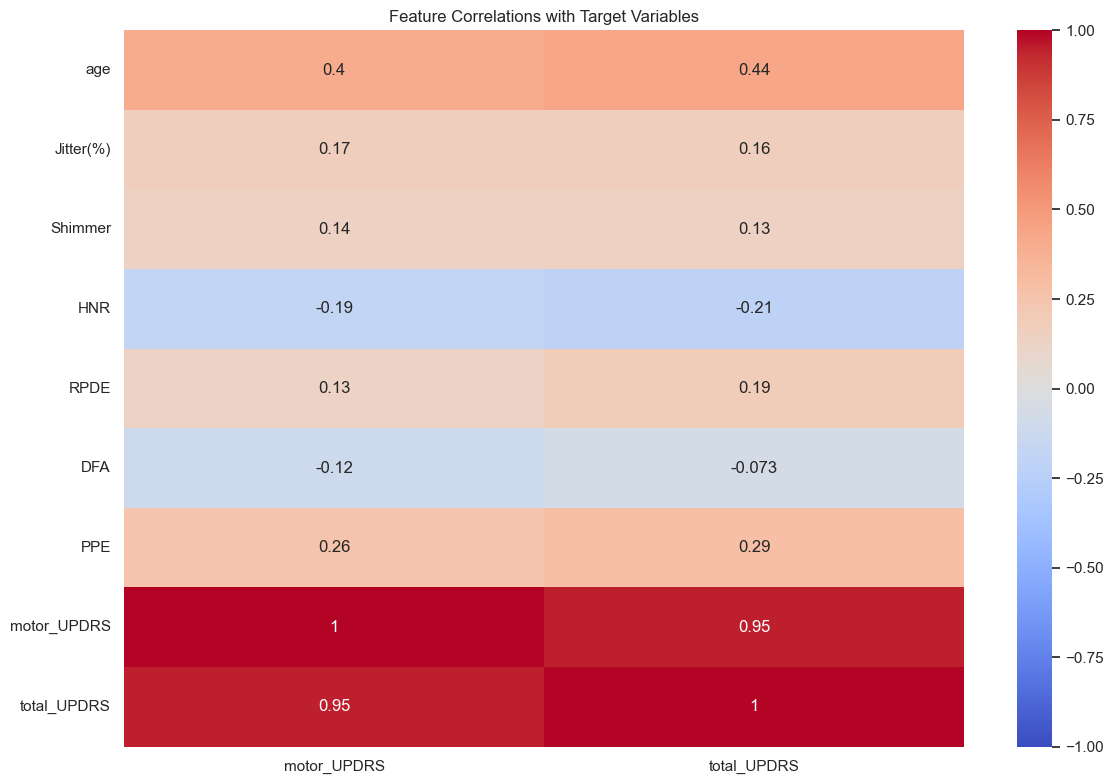

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('parkinsons_updrs.data')
meaningful_columns = [
    'subject#',
    'age', 
    'motor_UPDRS', 
    'total_UPDRS', 
    'Jitter(%)',  
    'Shimmer',    
    'HNR',        
    'RPDE', 
    'DFA', 
    'PPE'
]
df_selected = df[meaningful_columns]

patient_ids = df_selected['subject#'].unique()
train_patients, temp_patients = train_test_split(patient_ids, test_size=0.2, random_state=42)
val_patients, test_patients = train_test_split(temp_patients, test_size=0.5, random_state=42)

train_mask = df_selected['subject#'].isin(train_patients)
val_mask = df_selected['subject#'].isin(val_patients)
test_mask = df_selected['subject#'].isin(test_patients)

df_train = df_selected[train_mask].groupby('subject#').agg({
    'age': 'first',
    'Jitter(%)': 'mean',
    'Shimmer': 'mean',
    'HNR': 'mean',
    'RPDE': 'mean',
    'DFA': 'mean',
    'PPE': 'mean',
    'motor_UPDRS': 'mean',
    'total_UPDRS': 'mean'
}).reset_index()

df_val = df_selected[val_mask].groupby('subject#').agg({
    'age': 'first',
    'Jitter(%)': 'mean',
    'Shimmer': 'mean',
    'HNR': 'mean',
    'RPDE': 'mean',
    'DFA': 'mean',
    'PPE': 'mean',
    'motor_UPDRS': 'mean',
    'total_UPDRS': 'mean'
}).reset_index()

df_test = df_selected[test_mask].groupby('subject#').agg({
    'age': 'first',
    'Jitter(%)': 'mean',
    'Shimmer': 'mean',
    'HNR': 'mean',
    'RPDE': 'mean',
    'DFA': 'mean',
    'PPE': 'mean',
    'motor_UPDRS': 'mean',
    'total_UPDRS': 'mean'
}).reset_index()

X_train = df_train.drop(['subject#', 'motor_UPDRS', 'total_UPDRS'], axis=1)
X_val = df_val.drop(['subject#', 'motor_UPDRS', 'total_UPDRS'], axis=1)
X_test = df_test.drop(['subject#', 'motor_UPDRS', 'total_UPDRS'], axis=1)

y_motor_train = df_train['motor_UPDRS']
y_motor_val = df_val['motor_UPDRS']
y_motor_test = df_test['motor_UPDRS']

y_total_train = df_train['total_UPDRS']
y_total_val = df_val['total_UPDRS']
y_total_test = df_test['total_UPDRS']

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print("\nDataset Summary:")
print(f"Total number of patients: {len(patient_ids)}")
print(f"Training set size: {len(train_patients)} ({len(train_patients)/len(patient_ids)*100:.1f}%)")
print(f"Validation set size: {len(val_patients)} ({len(val_patients)/len(patient_ids)*100:.1f}%)")
print(f"Testing set size: {len(test_patients)} ({len(test_patients)/len(patient_ids)*100:.1f}%)")

print("\nFinal features used:")
print(X_train_scaled.columns.tolist())

plt.figure(figsize=(12, 8))
correlations = X_train_scaled.join(pd.DataFrame({
    'motor_UPDRS': y_motor_train,
    'total_UPDRS': y_total_train
})).corr()[['motor_UPDRS', 'total_UPDRS']]
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlations with Target Variables')
plt.tight_layout()
plt.show()

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet

def tune_and_evaluate_models(X_train_scaled, X_val_scaled, y_train, y_val):
    
    print(f"Training data shape: {X_train_scaled.shape}")
    print(f"Validation data shape: {X_val_scaled.shape}")
    
    
    models = {
    'Linear': {
        'model': ElasticNet(random_state=42),
        'params': {
            'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
            'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
        }
    },
    'KNN': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [1, 3, 5, 7, 10]
        }
    },
    'RF': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'max_depth': [1, 3, 10],
            'min_samples_split': [0.01, 0.1],
            'n_estimators': [10, 30, 100]
        }
    },
    'XGBoost': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'max_depth': [3, 10, 30],
            'learning_rate': [0.01, 0.1],
            'n_estimators': [100, 300]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'gamma': [0.01, 0.1, 1],
            'C': [0.1, 1, 10],
            'kernel': ['rbf']
        }
    }
}
    
    results = {}
    for name, config in models.items():
        print(f"\nTraining {name} model...")
        try:
            if config['params']:  
                grid_search = GridSearchCV(
                    config['model'],
                    config['params'],
                    cv=3, 
                    scoring='neg_root_mean_squared_error',
                    n_jobs=-1,
                    error_score='raise' 
                )
                grid_search.fit(X_train_scaled, y_train)
                best_model = grid_search.best_estimator_
                train_score = -grid_search.best_score_
                best_params = grid_search.best_params_
                print(f"Best parameters found: {best_params}")
            else:  
                best_model = config['model']
                best_model.fit(X_train_scaled, y_train)
                train_pred = best_model.predict(X_train_scaled)
                train_score = np.sqrt(mean_squared_error(y_train, train_pred))
                best_params = {}
            
            val_pred = best_model.predict(X_val_scaled)
            val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))
            val_r2 = r2_score(y_val, val_pred)
            
            results[name] = {
                'model': best_model,
                'best_params': best_params,
                'train_rmse': train_score,
                'val_rmse': val_rmse,
                'val_r2': val_r2
            }
            
            print(f"Validation RMSE: {val_rmse:.4f}")
            print(f"Validation R2: {val_r2:.4f}")
            
        except Exception as e:
            print(f"Error training {name} model: {str(e)}")
            continue
    
    return results

def main():
    global motor_results, total_results, baseline_rmse_motor_test, baseline_rmse_total_test

    baseline_rmse_motor = np.sqrt(mean_squared_error(y_motor_val, [y_motor_train.mean()] * len(y_motor_val)))
    baseline_rmse_total = np.sqrt(mean_squared_error(y_total_val, [y_total_train.mean()] * len(y_total_val)))
    
    print("Training and evaluating models for Motor UPDRS...")
    motor_results = tune_and_evaluate_models(X_train_scaled, X_val_scaled, y_motor_train, y_motor_val)
    
    print("\nTraining and evaluating models for Total UPDRS...")
    total_results = tune_and_evaluate_models(X_train_scaled, X_val_scaled, y_total_train, y_total_val)
    
    performance_summary = pd.DataFrame({
        'Model': ['Baseline'] + list(motor_results.keys()),
        'Motor_RMSE': [baseline_rmse_motor] + [res['val_rmse'] for res in motor_results.values()],
        'Total_RMSE': [baseline_rmse_total] + [res['val_rmse'] for res in total_results.values()],
    })
    
    print("\nPerformance Summary:")
    print(performance_summary.round(4))
    
    print("\nBaseline Comparison:")
    print(f"Motor UPDRS baseline RMSE: {baseline_rmse_motor:.4f}")
    print(f"Total UPDRS baseline RMSE: {baseline_rmse_total:.4f}")
    
    print("\nDetailed Results for Each Model:")
    for name in motor_results.keys():
        print(f"\n{name}:")
        print(f"Motor UPDRS:")
        print(f"  Best parameters: {motor_results[name]['best_params']}")
        print(f"  Training RMSE: {motor_results[name]['train_rmse']:.4f}")
        print(f"  Validation RMSE: {motor_results[name]['val_rmse']:.4f}")
        print(f"  Validation R2: {motor_results[name]['val_r2']:.4f}")
        
        print(f"\nTotal UPDRS:")
        print(f"  Best parameters: {total_results[name]['best_params']}")
        print(f"  Training RMSE: {total_results[name]['train_rmse']:.4f}")
        print(f"  Validation RMSE: {total_results[name]['val_rmse']:.4f}")
        print(f"  Validation R2: {total_results[name]['val_r2']:.4f}")
    
    global baseline_rmse_motor_test, baseline_rmse_total_test
    baseline_rmse_motor_test = np.sqrt(mean_squared_error(y_motor_test, [y_motor_train.mean()] * len(y_motor_test)))
    baseline_rmse_total_test = np.sqrt(mean_squared_error(y_total_test, [y_total_train.mean()] * len(y_total_test)))

if __name__ == "__main__":
    main()

Training and evaluating models for Motor UPDRS...
Training data shape: (33, 7)
Validation data shape: (4, 7)

Training Linear model...
Best parameters found: {'alpha': 1.0, 'l1_ratio': 0.1}
Validation RMSE: 7.6312
Validation R2: 0.1808

Training KNN model...
Best parameters found: {'n_neighbors': 10}
Validation RMSE: 7.7031
Validation R2: 0.1653

Training RF model...
Best parameters found: {'max_depth': 1, 'min_samples_split': 0.01, 'n_estimators': 10}
Validation RMSE: 8.9216
Validation R2: -0.1196

Training XGBoost model...
Best parameters found: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Validation RMSE: 11.8538
Validation R2: -0.9765

Training SVR model...
Best parameters found: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Validation RMSE: 8.7522
Validation R2: -0.0775

Training and evaluating models for Total UPDRS...
Training data shape: (33, 7)
Validation data shape: (4, 7)

Training Linear model...
Best parameters found: {'alpha': 1.0, 'l1_ratio': 0.7}
Validation RMS

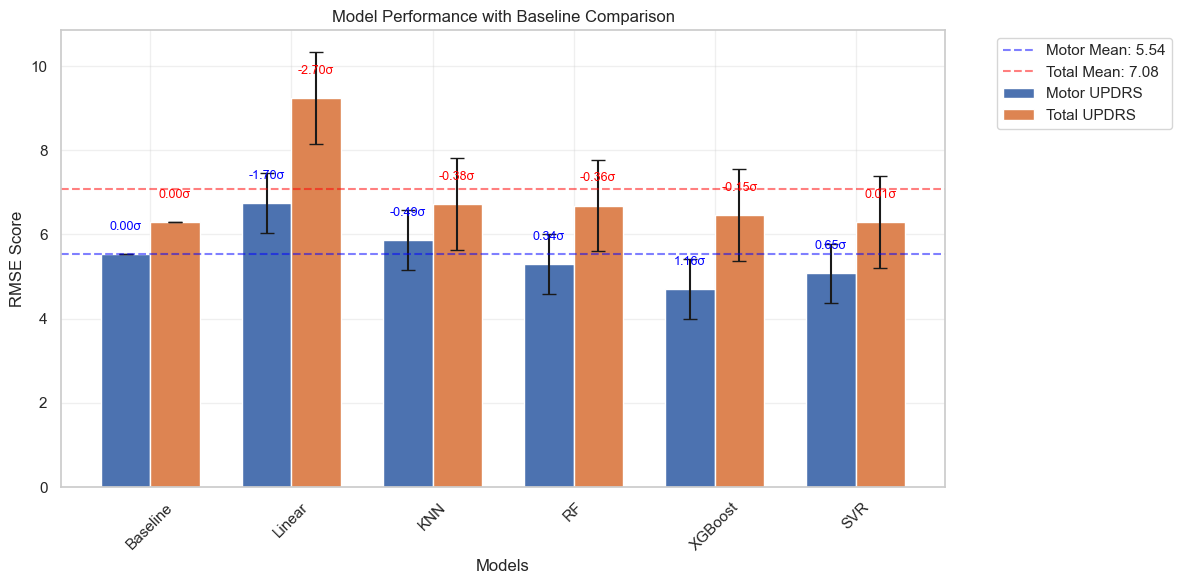

Motor UPDRS - Mean: 5.5370 ± 0.7105
Total UPDRS - Mean: 7.0779 ± 1.0915
Standard Deviations Above/Below Baseline:
Baseline - Motor: 0.00σ, Total: 0.00σ
Linear - Motor: -1.70σ, Total: -2.70σ
KNN - Motor: -0.49σ, Total: -0.38σ
RF - Motor: 0.34σ, Total: -0.36σ
XGBoost - Motor: 1.16σ, Total: -0.15σ
SVR - Motor: 0.65σ, Total: 0.01σ


In [49]:
plt.figure(figsize=(12, 6))
models = ['Baseline'] + list(motor_results.keys())
motor_test_scores = [baseline_rmse_motor_test]
total_test_scores = [baseline_rmse_total_test]

for name in motor_results.keys():
    motor_test_pred = motor_results[name]['model'].predict(X_test_scaled)
    motor_test_rmse = np.sqrt(mean_squared_error(y_motor_test, motor_test_pred))
    motor_test_scores.append(motor_test_rmse)
    
    total_test_pred = total_results[name]['model'].predict(X_test_scaled)
    total_test_rmse = np.sqrt(mean_squared_error(y_total_test, total_test_pred))
    total_test_scores.append(total_test_rmse)

motor_test_scores = np.array(motor_test_scores)
total_test_scores = np.array(total_test_scores)

motor_mean = np.mean(motor_test_scores[1:])
total_mean = np.mean(total_test_scores[1:])
motor_std = np.std(motor_test_scores[1:])
total_std = np.std(total_test_scores[1:])

motor_std_above_baseline = (baseline_rmse_motor_test - motor_test_scores) / motor_std
total_std_above_baseline = (baseline_rmse_total_test - total_test_scores) / total_std

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, motor_test_scores, width, label='Motor UPDRS',
        yerr=[0] + [motor_std]*(len(models)-1), capsize=5)
plt.bar(x + width/2, total_test_scores, width, label='Total UPDRS',
        yerr=[0] + [total_std]*(len(models)-1), capsize=5)

plt.axhline(y=motor_mean, color='blue', linestyle='--', alpha=0.5,
           label=f'Motor Mean: {motor_mean:.2f}')
plt.axhline(y=total_mean, color='red', linestyle='--', alpha=0.5,
           label=f'Total Mean: {total_mean:.2f}')

for i, (motor_val, total_val) in enumerate(zip(motor_std_above_baseline, total_std_above_baseline)):
    plt.text(x[i] - width/2, motor_test_scores[i] + 0.5, f'{motor_val:.2f}σ', 
             ha='center', va='bottom', fontsize=9, color='blue')
    plt.text(x[i] + width/2, total_test_scores[i] + 0.5, f'{total_val:.2f}σ', 
             ha='center', va='bottom', fontsize=9, color='red')

plt.xlabel('Models')
plt.ylabel('RMSE Score')
plt.title('Model Performance with Baseline Comparison')
plt.xticks(x, models, rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Motor UPDRS - Mean: {motor_mean:.4f} ± {motor_std:.4f}")
print(f"Total UPDRS - Mean: {total_mean:.4f} ± {total_std:.4f}")
print("Standard Deviations Above/Below Baseline:")
for i, model in enumerate(models):
    print(f"{model} - Motor: {motor_std_above_baseline[i]:.2f}σ, Total: {total_std_above_baseline[i]:.2f}σ")


Uncertainty Analysis Results:

Motor UPDRS:
Linear   - Mean RMSE: 8.6517 ± 2.1026
KNN      - Mean RMSE: 7.6792 ± 1.5298
RF       - Mean RMSE: 7.9286 ± 1.5189
XGBoost  - Mean RMSE: 8.1969 ± 2.3900
SVR      - Mean RMSE: 8.2128 ± 1.7411

Total UPDRS:
Linear   - Mean RMSE: 11.6391 ± 3.5566
KNN      - Mean RMSE: 10.4243 ± 3.0046
RF       - Mean RMSE: 10.9964 ± 2.7442
XGBoost  - Mean RMSE: 12.0209 ± 3.8413
SVR      - Mean RMSE: 10.6304 ± 3.3415


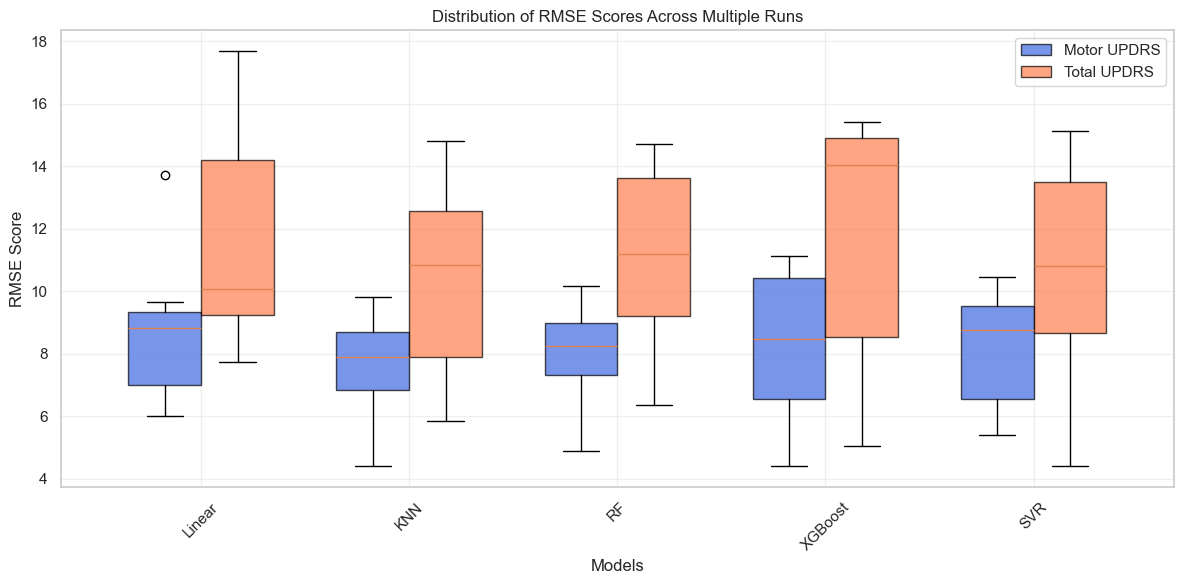

In [41]:
n_iterations = 10
random_states = range(42, 42+n_iterations)

results_across_runs = {
    'motor': {model: [] for model in ['Linear', 'KNN', 'RF', 'XGBoost', 'SVR']},
    'total': {model: [] for model in ['Linear', 'KNN', 'RF', 'XGBoost', 'SVR']}
}

for seed in random_states:
    patient_ids = df_selected['subject#'].unique()
    train_patients, temp_patients = train_test_split(patient_ids, test_size=0.3, random_state=seed)
    val_patients, test_patients = train_test_split(temp_patients, test_size=0.33, random_state=seed)
    
    train_mask = df_selected['subject#'].isin(train_patients)
    val_mask = df_selected['subject#'].isin(val_patients)
    test_mask = df_selected['subject#'].isin(test_patients)
    
    df_train = df_selected[train_mask].groupby('subject#').agg({
        'age': 'first',
        'Jitter(%)': 'mean',
        'Shimmer': 'mean',
        'HNR': 'mean',
        'RPDE': 'mean',
        'DFA': 'mean',
        'PPE': 'mean',
        'motor_UPDRS': 'mean',
        'total_UPDRS': 'mean'
    }).reset_index()
    
    df_test = df_selected[test_mask].groupby('subject#').agg({
        'age': 'first',
        'Jitter(%)': 'mean',
        'Shimmer': 'mean',
        'HNR': 'mean',
        'RPDE': 'mean',
        'DFA': 'mean',
        'PPE': 'mean',
        'motor_UPDRS': 'mean',
        'total_UPDRS': 'mean'
    }).reset_index()
    
    X_train_iter = df_train.drop(['subject#', 'motor_UPDRS', 'total_UPDRS'], axis=1)
    X_test_iter = df_test.drop(['subject#', 'motor_UPDRS', 'total_UPDRS'], axis=1)
    y_motor_train_iter = df_train['motor_UPDRS']
    y_motor_test_iter = df_test['motor_UPDRS']
    y_total_train_iter = df_train['total_UPDRS']
    y_total_test_iter = df_test['total_UPDRS']
    
    scaler = StandardScaler()
    X_train_scaled_iter = pd.DataFrame(scaler.fit_transform(X_train_iter), columns=X_train_iter.columns)
    X_test_scaled_iter = pd.DataFrame(scaler.transform(X_test_iter), columns=X_test_iter.columns)
    
    models = {
        'Linear': LinearRegression(),
        'KNN': KNeighborsRegressor(n_neighbors=7),
        'RF': RandomForestRegressor(random_state=seed),
        'XGBoost': GradientBoostingRegressor(random_state=seed),
        'SVR': SVR()
    }
    
    for name, model in models.items():
        model.fit(X_train_scaled_iter, y_motor_train_iter)
        y_pred = model.predict(X_test_scaled_iter)
        rmse = np.sqrt(mean_squared_error(y_motor_test_iter, y_pred))
        results_across_runs['motor'][name].append(rmse)
        
        model.fit(X_train_scaled_iter, y_total_train_iter)
        y_pred = model.predict(X_test_scaled_iter)
        rmse = np.sqrt(mean_squared_error(y_total_test_iter, y_pred))
        results_across_runs['total'][name].append(rmse)

print("Uncertainty Analysis Results:\n")
print("Motor UPDRS:")
for model in results_across_runs['motor']:
    scores = results_across_runs['motor'][model]
    print(f"{model:8} - Mean RMSE: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

print("\nTotal UPDRS:")
for model in results_across_runs['total']:
    scores = results_across_runs['total'][model]
    print(f"{model:8} - Mean RMSE: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

plt.figure(figsize=(12, 6))
models = list(results_across_runs['motor'].keys())

motor_data = [results_across_runs['motor'][m] for m in models]
total_data = [results_across_runs['total'][m] for m in models]

positions = np.arange(len(models))
width = 0.35

bp1 = plt.boxplot(motor_data, positions=positions-width/2, widths=width, 
                 patch_artist=True, boxprops=dict(facecolor='royalblue', alpha=0.7))
bp2 = plt.boxplot(total_data, positions=positions+width/2, widths=width, 
                 patch_artist=True, boxprops=dict(facecolor='coral', alpha=0.7))

plt.xticks(positions, models, rotation=45)
plt.xlabel('Models')
plt.ylabel('RMSE Score')
plt.title('Distribution of RMSE Scores Across Multiple Runs')

plt.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Motor UPDRS', 'Total UPDRS'], 
          loc='upper right')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

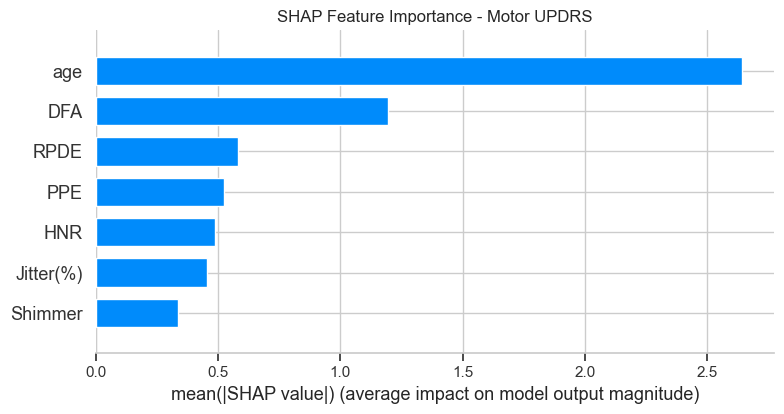

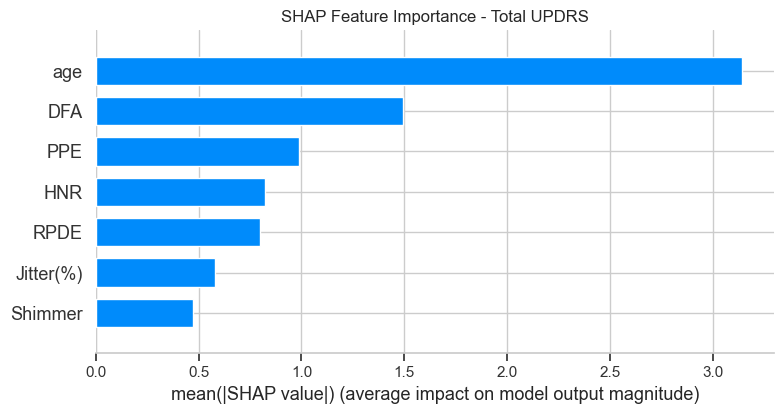

In [42]:
import shap

rf_motor = RandomForestRegressor(random_state=42)
rf_motor.fit(X_train_scaled, y_motor_train)

rf_total = RandomForestRegressor(random_state=42)
rf_total.fit(X_train_scaled, y_total_train)

explainer_motor = shap.TreeExplainer(rf_motor)
shap_values_motor = explainer_motor.shap_values(X_train_scaled)

explainer_total = shap.TreeExplainer(rf_total)
shap_values_total = explainer_total.shap_values(X_train_scaled)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_motor, X_train_scaled, plot_type="bar", show=False)
plt.title('SHAP Feature Importance - Motor UPDRS')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_total, X_train_scaled, plot_type="bar", show=False)
plt.title('SHAP Feature Importance - Total UPDRS')
plt.tight_layout()
plt.show()

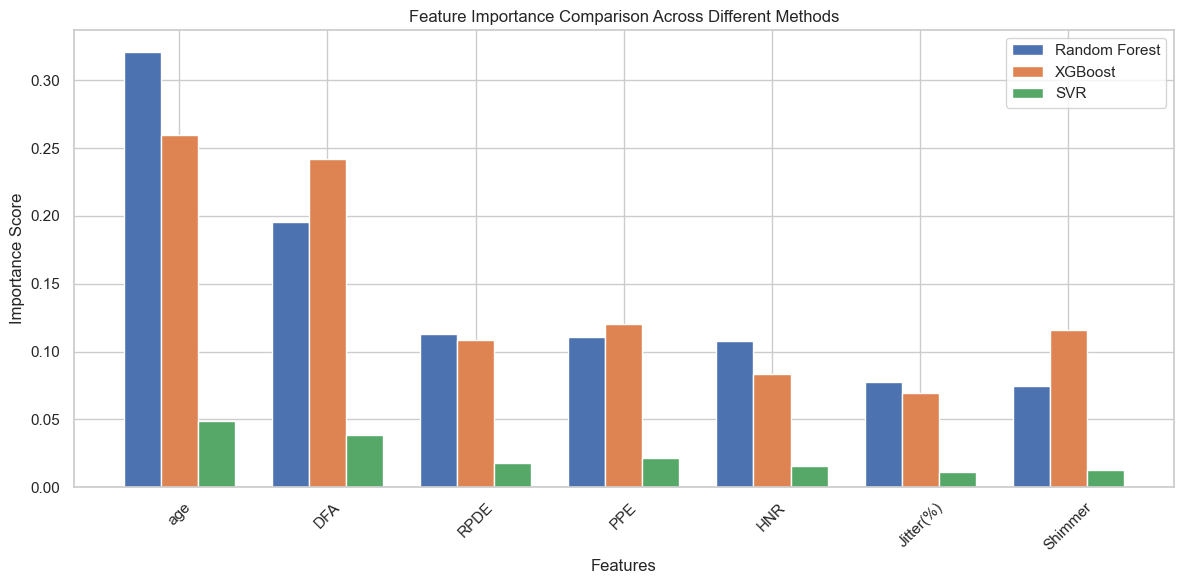


Feature Importance Rankings:
     Feature  RF_Importance  XGB_Importance  SVR_Importance
0        age         0.3208          0.2597          0.0485
5        DFA         0.1953          0.2422          0.0386
4       RPDE         0.1128          0.1083          0.0177
6        PPE         0.1106          0.1204          0.0212
3        HNR         0.1079          0.0835          0.0156
1  Jitter(%)         0.0778          0.0698          0.0114
2    Shimmer         0.0748          0.1162          0.0127


In [43]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_motor_train)
rf_importance = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'RF_Importance': rf_model.feature_importances_
})

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_motor_train)
xgb_importance = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'XGB_Importance': xgb_model.feature_importances_
})

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_motor_train)
svr_importance_result = permutation_importance(svr_model, X_train_scaled, y_motor_train, 
                                             n_repeats=10, random_state=42)
svr_importance = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'SVR_Importance': svr_importance_result.importances_mean
})

feature_importance = (rf_importance.merge(xgb_importance, on='Feature')
                                 .merge(svr_importance, on='Feature'))
feature_importance = feature_importance.sort_values(by='RF_Importance', ascending=False)

plt.figure(figsize=(12, 6))
x = np.arange(len(feature_importance))
width = 0.25

plt.bar(x - width, feature_importance['RF_Importance'], width, label='Random Forest')
plt.bar(x, feature_importance['XGB_Importance'], width, label='XGBoost')
plt.bar(x + width, feature_importance['SVR_Importance'], width, label='SVR')

plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Comparison Across Different Methods')
plt.xticks(x, feature_importance['Feature'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

print("\nFeature Importance Rankings:")
print(feature_importance.round(4))

In [44]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

baseline_rmse_motor = np.sqrt(mean_squared_error(y_motor_test, [y_motor_train.mean()] * len(y_motor_test)))
baseline_rmse_total = np.sqrt(mean_squared_error(y_total_test, [y_total_train.mean()] * len(y_total_test)))

models = ['Baseline', 'Linear', 'KNN', 'Random Forest', 'XGBoost', 'SVR']
motor_rmse = [baseline_rmse_motor]
total_rmse = [baseline_rmse_total]

for name in ['Linear', 'KNN', 'RF', 'XGBoost', 'SVR']:
    motor_test_pred = motor_results[name]['model'].predict(X_test_scaled)
    total_test_pred = total_results[name]['model'].predict(X_test_scaled)
    
    motor_rmse.append(np.sqrt(mean_squared_error(y_motor_test, motor_test_pred)))
    total_rmse.append(np.sqrt(mean_squared_error(y_total_test, total_test_pred)))

motor_improvement = [(baseline_rmse_motor - rmse) / baseline_rmse_motor * 100 for rmse in motor_rmse]
total_improvement = [(baseline_rmse_total - rmse) / baseline_rmse_total * 100 for rmse in total_rmse]

results_df = pd.DataFrame({
    'Model': models,
    'Motor RMSE': np.round(motor_rmse, 4),
    'Total RMSE': np.round(total_rmse, 4),
    'Motor Improvement': [f"{improve:.2f}%" for improve in motor_improvement],
    'Total Improvement': [f"{improve:.2f}%" for improve in total_improvement]
})

print(results_df)


           Model  Motor RMSE  Total RMSE Motor Improvement Total Improvement
0       Baseline      5.5319      6.2965             0.00%             0.00%
1         Linear      6.7386      9.2387           -21.81%           -46.73%
2            KNN      5.8767      6.7133            -6.23%            -6.62%
3  Random Forest      5.2895      6.6866             4.38%            -6.20%
4        XGBoost      4.7075      6.4647            14.90%            -2.67%
5            SVR      5.0729      6.2864             8.30%             0.16%


In [61]:
results_df.to_csv('model_metrics.csv', index=False)

feature_importance.to_csv('feature_importance.csv', index=False)

In [62]:
test_predictions = pd.DataFrame({
    'true_motor_UPDRS': y_motor_test,
    'predicted_motor_UPDRS': motor_test_pred,
    'true_total_UPDRS': y_total_test,
    'predicted_total_UPDRS': total_test_pred
})
test_predictions.to_csv('test_predictions.csv', index=False)

In [63]:
import joblib

import os
os.makedirs('results/saved_models', exist_ok=True)

for name in ['Linear', 'KNN', 'RF', 'XGBoost', 'SVR']:
    joblib.dump(motor_results[name]['model'], 
                f'results/saved_models/motor_{name.lower()}.pkl')
    
for name in ['Linear', 'KNN', 'RF', 'XGBoost', 'SVR']:
    joblib.dump(total_results[name]['model'], 
                f'results/saved_models/total_{name.lower()}.pkl')